In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

directory = r'C:\Users\italo\OneDrive\Desktop'
file = 'yoo.csv'
df_3 = pd.read_csv(f'{directory}/{file}')
df_3.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,0,R,74,2,3,29,0,1344,0.743,"1,306",NaN
1,OAS1_0002_MR1,0,R,55,4,1,29,0,1147,0.810,"1,531",NaN
2,OAS1_0003_MR1,0,R,73,4,3,27,1,1454,0.708,"1,207",NaN
3,OAS1_0010_MR1,1,R,74,5,2,30,0,1636,0.689,"1,073",NaN
4,OAS1_0011_MR1,0,R,52,3,2,30,0,1321,0.827,"1,329",NaN


In [2]:
df_3 = df_3.drop(columns = ['ID', 'Hand', 'Delay'])

In [3]:
df_3['ASF'] = df_3['ASF'].apply(lambda x: float(x.split()[0].replace(',', '.'))) #now we see ASF like float64 type

In [4]:
df_3.dtypes

M/F       int64
Age       int64
Educ      int64
SES       int64
MMSE      int64
CDR       int64
eTIV      int64
nWBV    float64
ASF     float64
dtype: object

In [5]:
label_2 = df_3.loc[df_3['CDR'] == 2] #.assign(Location=1)
label_3 = df_3.loc[df_3['CDR'] == 3] #.assign(Location=2)

In [6]:
summary_2 = label_2.describe()
#summary_2 = summary_2.rename(columns={'Age': 'Age_2'})
summary_2

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.0,24.000000,24.000000,24.000000
mean,0.291667,78.458333,2.583333,2.875000,21.958333,2.0,1477.791667,0.705500,1.194625
std,0.464306,6.560615,1.380506,1.295897,3.263489,0.0,118.267927,0.030625,0.093525
min,0.000000,69.000000,1.000000,1.000000,15.000000,2.0,1274.000000,0.655000,1.013000
25%,0.000000,72.750000,1.750000,2.000000,20.000000,2.0,1397.500000,0.683750,1.161500
50%,0.000000,78.000000,2.000000,3.000000,22.000000,2.0,1477.000000,0.698000,1.188500
75%,1.000000,83.000000,4.000000,4.000000,23.000000,2.0,1511.500000,0.731500,1.256000
max,1.000000,96.000000,5.000000,5.000000,28.000000,2.0,1732.000000,0.762000,1.377000


In [7]:
summary_3 = label_3.describe()
#summary_3 = summary_3.rename(columns={'Age': 'Age_3'})
summary_3

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
count,2.000000,2.000000,2.000000,2.000000,2.0,2.0,2.000000,2.00000,2.000000
mean,0.500000,82.000000,2.000000,3.500000,15.0,3.0,1456.500000,0.68400,1.207000
std,0.707107,5.656854,1.414214,0.707107,0.0,0.0,78.488853,0.02687,0.065054
min,0.000000,78.000000,1.000000,3.000000,15.0,3.0,1401.000000,0.66500,1.161000
25%,0.250000,80.000000,1.500000,3.250000,15.0,3.0,1428.750000,0.67450,1.184000
50%,0.500000,82.000000,2.000000,3.500000,15.0,3.0,1456.500000,0.68400,1.207000
75%,0.750000,84.000000,2.500000,3.750000,15.0,3.0,1484.250000,0.69350,1.230000
max,1.000000,86.000000,3.000000,4.000000,15.0,3.0,1512.000000,0.70300,1.253000


In [8]:
Age_2 = label_2.drop(columns = ['Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']).assign(Location=2)
Age_3 = label_3.drop(columns = ['Educ', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']).assign(Location=3)

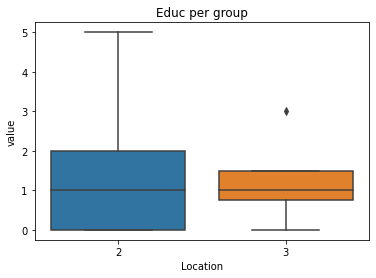

In [10]:
Educ_2 = label_2.drop(columns = ['Age', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']).assign(Location=2)
Educ_3 = label_3.drop(columns = ['Age', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']).assign(Location=3)
cdf = pd.concat([Educ_2, Educ_3])    
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['CDR'])
#print(mdf.head())

ax = sns.boxplot(x="Location", y="value", data=mdf)    
plt.title('Educ per group')
plt.savefig('2')
plt.show()

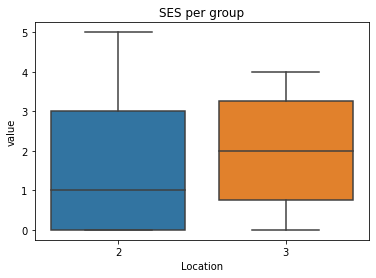

In [11]:
SES_2 = label_2.drop(columns = ['Age', 'Educ', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']).assign(Location=2)
SES_3 = label_3.drop(columns = ['Age', 'Educ', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']).assign(Location=3)
cdf = pd.concat([SES_2, SES_3])    
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['CDR'])
#print(mdf.head())

ax = sns.boxplot(x="Location", y="value", data=mdf)    
plt.title('SES per group')
plt.savefig('3')
plt.show()

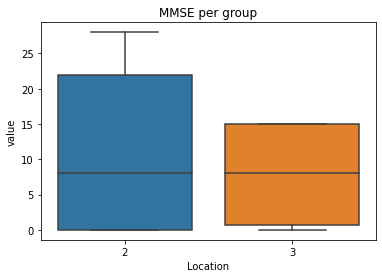

In [12]:
MMSE_2 = label_2.drop(columns = ['Age', 'Educ', 'SES', 'CDR', 'eTIV', 'nWBV', 'ASF']).assign(Location=2)
MMSE_3 = label_3.drop(columns = ['Age', 'Educ', 'SES', 'CDR', 'eTIV', 'nWBV', 'ASF']).assign(Location=3)
cdf = pd.concat([MMSE_2, MMSE_3])    
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['CDR'])
#print(mdf.head())

ax = sns.boxplot(x="Location", y="value", data=mdf)    
plt.title('MMSE per group')
plt.savefig('4')
plt.show()

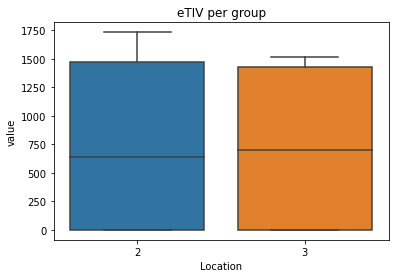

In [13]:
eTIV_2 = label_2.drop(columns = ['Age', 'Educ', 'SES', 'CDR', 'MMSE', 'nWBV', 'ASF']).assign(Location=2)
eTIV_3 = label_3.drop(columns = ['Age', 'Educ', 'SES', 'CDR', 'MMSE', 'nWBV', 'ASF']).assign(Location=3)
cdf = pd.concat([eTIV_2, eTIV_3])    
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['CDR'])
#print(mdf.head())

ax = sns.boxplot(x="Location", y="value", data=mdf)    
plt.title('eTIV per group')
plt.savefig('5')
plt.show()

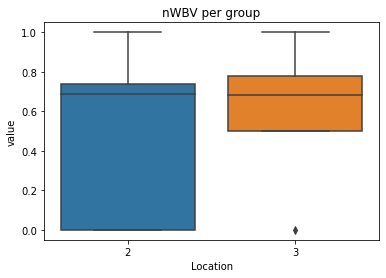

In [14]:
nWBV_2 = label_2.drop(columns = ['Age', 'Educ', 'SES', 'CDR', 'MMSE', 'eTIV', 'ASF']).assign(Location=2)
nWBV_3 = label_3.drop(columns = ['Age', 'Educ', 'SES', 'CDR', 'MMSE', 'eTIV', 'ASF']).assign(Location=3)
cdf = pd.concat([nWBV_2, nWBV_3])    
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['CDR'])
#print(mdf.head())

ax = sns.boxplot(x="Location", y="value", data=mdf)    
plt.title('nWBV per group')
plt.savefig('6')
plt.show()

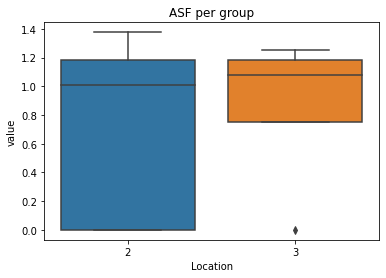

In [15]:
ASF_2 = label_2.drop(columns = ['Age', 'Educ', 'SES', 'CDR', 'MMSE', 'eTIV', 'nWBV']).assign(Location=2)
ASF_3 = label_3.drop(columns = ['Age', 'Educ', 'SES', 'CDR', 'MMSE', 'eTIV', 'nWBV']).assign(Location=3)
cdf = pd.concat([ASF_2, ASF_3])    
mdf = pd.melt(cdf, id_vars=['Location'], var_name=['CDR'])
#print(mdf.head())

ax = sns.boxplot(x="Location", y="value", data=mdf)    
plt.title('ASF per group')
plt.savefig('7')
plt.show()

In [1]:
#smote
data = [0.79, 0.65, 0.75, 0.71, 0.77, 0.73, 0.72, 0.78, 0.71, 0.74]
labels = ['Linear','Polynomial','Gaussian','Sigmoid', 'CV', 'merged_Linear', 'merged_Polynomial', 'merged_Gaussian',
          'merged_Sigmoid', 'merged_CV']

#len(data) == len(labels)

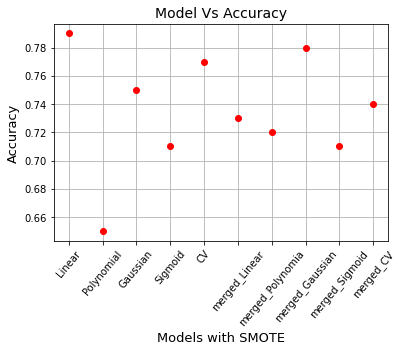

In [2]:
from matplotlib import pyplot as plt

plt.plot([i for i, e in enumerate(data)], data, 'ro'); plt.xticks([i for i, e in enumerate(labels)], [l[0:16] for l in labels])
plt.title("Model Vs Accuracy",fontsize = 14)
plt.xlabel('Models with SMOTE',fontsize = 13)
plt.xticks(rotation = 50)
plt.ylabel('Accuracy',fontsize = 13)
plt.grid()
plt.show()

In [3]:
#senza smote

data = [0.72, 0.66, 0.73, 0.86, 0.84, 0.68, 0.43, 0.45, 0.48, 0.48]
labels = ['Linear','Polynomial','Gaussian','Sigmoid', 'CV', 'merged_Linear','merged_Polynomial','merged_Gaussian',
          'merged_Sigmoid','merged_CV']

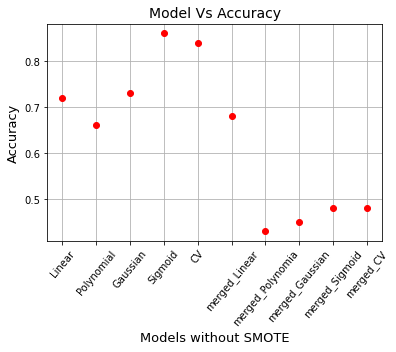

In [4]:
plt.plot([i for i, e in enumerate(data)], data, 'ro'); plt.xticks([i for i, e in enumerate(labels)], [l[0:16] for l in labels])
plt.title("Model Vs Accuracy",fontsize = 14)
plt.xlabel('Models without SMOTE',fontsize = 13)
plt.xticks(rotation = 50)
plt.ylabel('Accuracy',fontsize = 13)
plt.grid()
plt.show()

In [4]:
#svm vg logistic

data = [0.81, 0.8, 0.719, 0.7, 0.81, 0.81, 0.81, 0.87, 0.79, 0.78]
labels = ['SMOTE Multilogreg', 'SMOTE-RFE Multilogreg', 'Merged SMOTE Multilogreg', 'Merged SMOTE RFE Multilogreg', 
          'NoSMOTE Multilogreg', 'NoSMOTE RFE Multilogreg', 'Merged NoSMOTE Multilogreg', 'Merged NoSMOTE RFE Multilogreg',
          'SMOTE Linear SVM', 'SMOTE CV SVM']

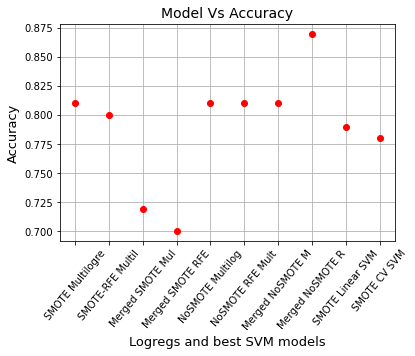

In [5]:
plt.plot([i for i, e in enumerate(data)], data, 'ro'); plt.xticks([i for i, e in enumerate(labels)], [l[0:16] for l in labels])
plt.title("Model Vs Accuracy",fontsize = 14)
plt.xlabel('Logregs and best SVM models',fontsize = 13)
plt.xticks(rotation = 50)
plt.ylabel('Accuracy',fontsize = 13)
plt.grid()
plt.show()